First, let's import required packages. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer

In [2]:
trainData = pd.read_csv('../data/raw/train.csv')

Next, we check distribution of different labels in our training set.

In [3]:
def generatePieChart(data, colName):
    percentage = data[colName].value_counts(normalize=True)
    values = [colName+' '+str(i) for i in percentage.index]
    plt.pie(percentage, labels=values, autopct='%1.1f%%', shadow=True)
    plt.show()
    return

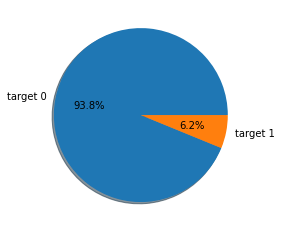

In [4]:
generatePieChart(trainData, 'target')

In [5]:
def generateBarPlot(data, colName):
    count = data[colName].value_counts()
    values = [str(i) for i in count.index]
    plt.bar(values, count)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ylabel(colName+' count')
    plt.xlabel(colName);
    plt.grid(axis='y', linestyle='--')
    plt.show()
    return

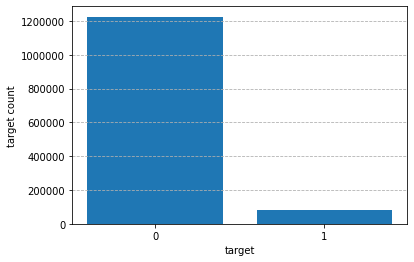

In [6]:
generateBarPlot(trainData, 'target')

As it can be seen from above, we have a large imbalance between the two categories as around 94% of training data has label 0 and only around 6% has label 1. Next, we check to see if there is any noticable different between the two groups in terms of number of words, number of letters and use of capital letters and punctuations.

In [7]:
def numWords(qtext):
    result = len(re.findall(r'\w+', qtext)) 
    return result

In [8]:
def numLetters(qtext):
    result = len([c for c in qtext.strip(string.punctuation) if c.isalpha()])
    return result

In [9]:
def numPunctuations(qtext):
    result = len([c for c in qtext if c in string.punctuation])
    return result

In [10]:
def numUppercaseLetters(qtext):
    result = len([c for c in qtext if c.isupper()])
    return result

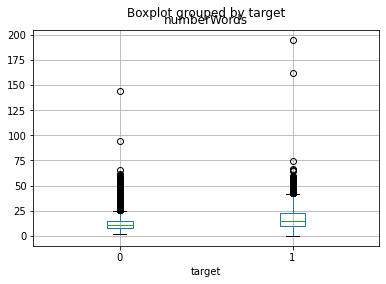

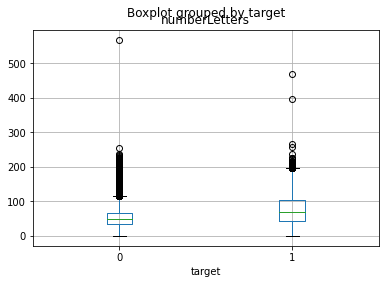

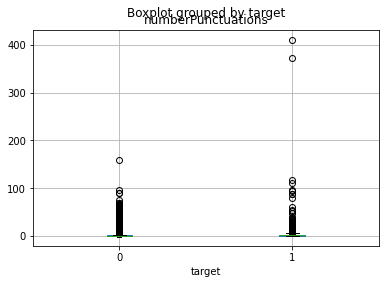

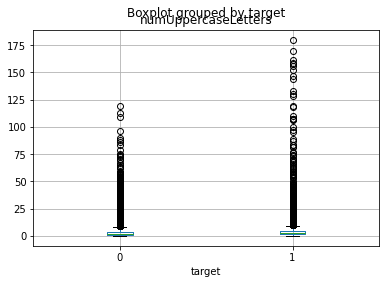

In [11]:
numWordsQuestion = trainData['question_text'].apply(numWords)
numLettersQuestion = trainData['question_text'].apply(numLetters)
numPunctuationsQuestion = trainData['question_text'].apply(numPunctuations)
numUppercaseLettersQuestion = trainData['question_text'].apply(numUppercaseLetters)
df = pd.DataFrame({'numberWords':numWordsQuestion, 
                   'numberLetters':numLettersQuestion,
                   'numberPunctuations':numPunctuationsQuestion,
                   'numUppercaseLetters':numUppercaseLettersQuestion,
                   'target':trainData['target']})
df.boxplot(column='numberWords', by='target')
df.boxplot(column='numberLetters', by='target')
df.boxplot(column='numberPunctuations', by='target')
df.boxplot(column='numUppercaseLetters', by='target')

From figure above, insincere questions seem to have more words and characters when compared to sincere questions. Next we work on preprocessing questions text by removing extra characters and stopwords and changing all letters to lower case. 

In [12]:
def removeExtraChars(qtext):
    result = [re.sub(r'[^A-Za-z ]+', ' ', sentence) for sentence in qtext]
    return result

In [13]:
def removeStopWords(qtext):
    # Remove stop words
    result = []
    for sentence in qtext:
        words = sentence.split()
        result.append(' '.join([w for w in words if w not in STOPWORDS]))
    return result

In [14]:
def preprocessText(qtext):
    
    # Remove extra characters
    qtext1 = removeExtraChars(qtext)
    
    # Lower case
    qtext2 = [sentence.lower() for sentence in qtext1]
    
    # Remove stop words
    result = removeStopWords(qtext2)
    
    return result

In [15]:
# Preprocess sincere questions
catZeroQuestions = preprocessText(trainData[trainData['target']==0]['question_text'].to_list())
# Preprocess insincere questions
catOneQuestions = preprocessText(trainData[trainData['target']==1]['question_text'].to_list())

After preprocessing question text for both sincere and insincere question, we tokenize and stem sentences and calculate document-term matrix (DTM).

In [16]:
def tokenize(sentence):
    tokens = [word for word in nltk.word_tokenize(sentence) if len(word)>1]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(item) for item in tokens]
    return stems

In [17]:
def createDTM(qtext):
    vectorizer = TfidfVectorizer(tokenizer = tokenize)
    tdm = vectorizer.fit_transform(qtext)
    return vectorizer, tdm

In [18]:
vectorizer0, tdm0 = createDTM(catZeroQuestions) 
vectorizer1, tdm1 = createDTM(catOneQuestions) 

In [19]:
#tdm0.shape

In [20]:
tdm1.shape

(80810, 24496)

In [21]:
def generateWordCloud(vectorizer, tdm):
    dtMx = pd.DataFrame(tdm.toarray(), columns=vectorizer.get_feature_names())
    d = {}
    keys = vectorizer.get_feature_names()
    for k in keys:
        #print(k)
        d[k] = dtMx[k].sum(axis=0)
    w = WordCloud(mode='RGBA',background_color='white', max_words=100).generate_from_frequencies(d)
    plt.imshow(w)
    plt.axis('off')
    plt.show()
    return

In [ ]:
generateWordCloud(vectorizer0, tdm0)

a
aa
aaa
aaaa
aaadhar
aaaq
aaat
aab
aabbcc
aabbccdd
aabbccddeeff
aabl
aac
aaccept
aaccount
aachar
aachen
aacount
aacsb
aadaar
aadar
aadgar
aadhaar
aadhar
aadharam
aadharcard
aadheenam
aadhi
aadhikari
aadithya
aaditya
aadmi
aadress
aadt
aaeiiomnntx
aaf
aaft
aafter
aag
aagc
aagna
aai
aaib
aaim
aaip
aaj
aaji
aajkaal
aajkal
aajtak
aakaash
aakar
aakasam
aakash
aakashian
aakashinstitut
aakriti
aaksah
aakshank
aakx
aalam
aalay
aalborg
aalishan
aaliya
aaliyah
aallah
aallow
aalochna
aaloo
aalto
aalumaa
aalumin
aam
aambai
aambi
aamconsult
aamerica
aami
aamir
aamplifi
aan
aana
aanchal
aand
aandroid
aang
aangan
aanganwadi
aani
aankh
aao
aap
aapg
aapher
aapi
aapk
aapki
aapko
aapl
aapli
aapna
aapplic
aaptard
aaptiv
aaqib
aar
aaradhya
aarakshan
aarambh
aarav
aardman
aarduino
aardvark
aargm
aarhu
aarm
aarmi
aaron
aaronson
aarop
aarp
aarti
aaru
aarushi
aarya
aasai
aasam
aase
aash
aashah
aashi
aashiq


In [ ]:
generateWordCloud(vectorizer1, tdm1)